<a href="https://colab.research.google.com/github/tbowling87/RetailExercise/blob/master/Group_1_Retail_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail Data Exercise: Group 1

##Data Preparation

In [0]:
#import libraries
import pandas as pd
import numpy as np
import datetime
import io
import sklearn
from google.colab import files


In [0]:
#upload raw data from beacons exercise - didn't want to save this in a public github!
uploaded = files.upload()

Saving beacon_data.csv to beacon_data.csv


In [0]:
#load the data in to a pandas data frame
raw_data = pd.read_csv(io.BytesIO(uploaded['beacon_data.csv']), sep = ";")

In [0]:
#take a peak at the raw data
raw_data.head()

,id,gtid,vendor_id,subscriber_id,merchant_id,signal_type,entry_date,exit_date,latitude,longitude,dongle_id,distance,proximity,rssi
0,2339839562,F9341167-6D6C-4321-924F-2E6B9D9CEF7A,135,29253903,2133,2,2017-05-01 09:54:14.000000,NaN,40.992124,29.126770,5536,-100.000000,unknown,0.0
1,2340151194,EB93B8DF-1F8D-4BD6-A4E5-67B9BACBF6CF,135,17090954,2133,2,2017-05-01 10:28:45.000000,NaN,40.992183,29.126761,5536,1668.100537,far,-86.0
2,2340151210,5563AB7A-C5B0-492D-80E5-04E52A5C0C28,135,17090954,2133,2,2017-05-01 10:28:45.000000,NaN,40.992183,29.126761,5536,1668.100537,far,-86.0
3,2340151187,55AFD11A-06A3-4E9D-8735-445F3DE654D7,178,15630196,2133,2,2017-05-01 10:28:45.000000,NaN,40.992183,29.126761,5536,1668.100537,far,-86.0
4,2340185826,52DE3BD3-655B-40F2-AC37-1199E0CBD31B,178,15630196,2133,2,2017-05-01 10:32:19.000000,NaN,40.992110,29.126783,5536,1467.799268,far,-85.0


In [0]:
#check out a quick summary
raw_data.describe()

,id,vendor_id,subscriber_id,merchant_id,signal_type,latitude,longitude,dongle_id,distance,rssi
count,1.252500e+05,125250.000000,1.252500e+05,125250.0,125250.000000,124279.000000,124279.000000,125250.0,109285.000000,109285.000000
mean,3.315534e+09,175.660072,2.201998e+07,2133.0,2.254930,40.974975,29.110562,5536.0,1408.055217,-70.516118
std,4.886681e+08,108.902448,8.206018e+06,0.0,0.666989,0.877990,0.629768,0.0,1334.454282,33.815410
min,2.338573e+09,6.000000,2.699200e+04,2133.0,2.000000,0.000000,0.000000,5536.0,-100.000000,-116.000000
25%,2.884233e+09,110.000000,1.645927e+07,2133.0,2.000000,40.992013,29.126663,5536.0,480.440266,-90.000000
50%,3.387717e+09,135.000000,2.362873e+07,2133.0,2.000000,40.992139,29.126753,5536.0,1257.377629,-85.000000
75%,3.795225e+09,331.000000,2.879388e+07,2133.0,2.000000,40.992211,29.126796,5536.0,2154.434690,-78.000000
max,3.927653e+09,1055.000000,3.573413e+07,2133.0,4.000000,41.396288,32.435247,5536.0,94675.469987,127.000000


In [0]:
#replace 0's in lat and long with averages
raw_data = raw_data.replace({'latitude': {0: raw_data['latitude'].median()}})
raw_data = raw_data.replace({'longitude': {0: raw_data['longitude'].median()}})

#replace -100's in distance with na's
raw_data = raw_data.replace({'distance': {-100: np.nan}})
#repalce 0's and 127 with na's in the rssi column
raw_data = raw_data.replace({'rssi': {0: np.nan,
                                      127: np.nan}})

In [0]:
#check how those changes have impacted the data
raw_data.describe()

,id,vendor_id,subscriber_id,merchant_id,signal_type,latitude,longitude,dongle_id,distance,rssi
count,1.252500e+05,125250.000000,1.252500e+05,125250.0,125250.000000,124279.000000,124279.000000,125250.0,89359.000000,89352.000000
mean,3.315534e+09,175.660072,2.201998e+07,2133.0,2.254930,40.993776,29.124155,5536.0,1744.333692,-86.252820
std,4.886681e+08,108.902448,8.206018e+06,0.0,0.666989,0.021561,0.030560,0.0,1248.056995,6.332788
min,2.338573e+09,6.000000,2.699200e+04,2133.0,2.000000,36.878855,27.535459,5536.0,0.027826,-116.000000
25%,2.884233e+09,110.000000,1.645927e+07,2133.0,2.000000,40.992013,29.126663,5536.0,888.904863,-90.000000
50%,3.387717e+09,135.000000,2.362873e+07,2133.0,2.000000,40.992139,29.126753,5536.0,1487.501330,-87.000000
75%,3.795225e+09,331.000000,2.879388e+07,2133.0,2.000000,40.992211,29.126796,5536.0,2441.971093,-83.000000
max,3.927653e+09,1055.000000,3.573413e+07,2133.0,4.000000,41.396288,32.435247,5536.0,94675.469987,-33.000000


Now we've tidied up the data a little, we will start aggregating the data, getting some summary information at a daily level


In [0]:
#convert entry date to datetime format
raw_data['entry_date'] = pd.to_datetime(raw_data['entry_date'])

#create new column that just has date, not time
raw_data['date_minus_time'] = raw_data["entry_date"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))	

#calculate number of unique subscriber_id's for each date 
visit_count = raw_data.groupby(['date_minus_time'])['subscriber_id'].nunique()
#calculate number of unique exit stamps (could be sales) per day    
exit_count = raw_data.groupby(['date_minus_time'])['exit_date'].nunique()
#calculate means for distance and rssi by day
avg_dist = raw_data.groupby(['date_minus_time'])['distance'].mean()
avg_rssi = raw_data.groupby(['date_minus_time'])['rssi'].mean()

print(visit_count.head())
print(exit_count.head())
print(avg_dist.head())
print(avg_rssi.head())

date_minus_time
2017-05-01    100
2017-05-02    112
2017-05-03    112
2017-05-04    100
2017-05-05    108
Name: subscriber_id, dtype: int64
date_minus_time
2017-05-01    102
2017-05-02    147
2017-05-03    146
2017-05-04    105
2017-05-05    161
Name: exit_date, dtype: int64
date_minus_time
2017-05-01    1569.171447
2017-05-02    1764.830439
2017-05-03    1649.324647
2017-05-04    2297.451138
2017-05-05    1545.418285
Name: distance, dtype: float64
date_minus_time
2017-05-01   -84.957006
2017-05-02   -86.655592
2017-05-03   -86.161916
2017-05-04   -85.913717
2017-05-05   -87.802835
Name: rssi, dtype: float64


Next lets try and understand how long on average a customer spends in the shop each day

In [0]:
#create unique subscriber/date column
raw_data['unique_user_date'] = raw_data['subscriber_id'].map(str) + raw_data['date_minus_time'].map(str) 

#calculate time difference between subsequent entries for a user on a given day
raw_data['diff'] = raw_data.sort_values(['unique_user_date', 'entry_date']).groupby('unique_user_date')['entry_date'].diff()

#calculate total stay duration per user per day - checked a few rows against the raw data and it seems to have worked
duration_calcs = raw_data.groupby(['unique_user_date', 'date_minus_time'])['diff'].sum()
#expand the output back in to a dataframe for further aggregation
duration_calcs = pd.DataFrame(duration_calcs).reset_index()
#convert the time delta in to a numeric value (number of seconds) to enable mean calculation
duration_calcs['diff_new'] = duration_calcs['diff'].dt.total_seconds()
#calculate average stay duration per day
avg_stay = duration_calcs.groupby(['date_minus_time'])['diff_new'].mean()

print(avg_stay.head())

date_minus_time
2017-05-01    1419.360000
2017-05-02    2984.330357
2017-05-03    3952.464286
2017-05-04    2667.450000
2017-05-05    3795.583333
Name: diff_new, dtype: float64


In [0]:
#combine visits, exits, stay length, distance and rssi in to one data frame
model_data = pd.concat((visit_count.rename('Visits'),
                        exit_count.rename('Exits'),
                        avg_stay.rename('Avg_Stay'),
                        avg_dist.rename('Avg_Dist'),
                        avg_rssi.rename('Avg_rssi')), axis = 1)

model_data.head()

,Visits,Exits,Avg_Stay,Avg_Dist,Avg_rssi
date_minus_time,,,,,
2017-05-01,100,102,1419.360000,1569.171447,-84.957006
2017-05-02,112,147,2984.330357,1764.830439,-86.655592
2017-05-03,112,146,3952.464286,1649.324647,-86.161916
2017-05-04,100,105,2667.450000,2297.451138,-85.913717
2017-05-05,108,161,3795.583333,1545.418285,-87.802835


##Data augmentation

It's possible that there is other information that may help us in predicting visits and exits. Weather and economic data is freely available online.

For ease of sharing with the group, I have saved this data in a public [github](https://github.com/tbowling87/RetailExercise) and will load this in below. The github also has the python script that was used to gather the weather data using the worldweatheronline.com APIs. The stock market data was obtained from https://www.investing.com/indices/ise-100-historical-data
 and I have filled any dates that were not in the table with the previous dates value (starting 28th April to get value for 1st May)


In [0]:
#read in csv created using weather API script
weather_data_url = 'https://raw.githubusercontent.com/tbowling87/RetailExercise/master/weather_data.csv'
weather_data = pd.read_csv(weather_data_url)

#convert the date column to datetime format and set the date as the index
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data = weather_data.set_index('date')
#combine with the model data
model_data = pd.concat((model_data, weather_data), axis =1)

model_data.head()

,Visits,Exits,Avg_Stay,Avg_Dist,Avg_rssi,Max_Temp,Min_Temp,Precipitation
2017-05-01,100,102,1419.360000,1569.171447,-84.957006,21,17,0.0
2017-05-02,112,147,2984.330357,1764.830439,-86.655592,21,19,0.0
2017-05-03,112,146,3952.464286,1649.324647,-86.161916,24,20,0.0
2017-05-04,100,105,2667.450000,2297.451138,-85.913717,24,21,0.0
2017-05-05,108,161,3795.583333,1545.418285,-87.802835,26,22,0.0


In [0]:
stock_data_url = 'https://raw.githubusercontent.com/tbowling87/RetailExercise/master/bist_100_price.csv'
stock_data = pd.read_csv(stock_data_url)

#perform similar steps as for weather data to combine with the model data
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data['Price'] = pd.to_numeric(stock_data['Price'])
stock_data = stock_data.set_index('date')
model_data = pd.concat((model_data, stock_data), axis =1)
model_data.head()

,Visits,Exits,Avg_Stay,Avg_Dist,Avg_rssi,Max_Temp,Min_Temp,Precipitation,Price
date,,,,,,,,,
2017-05-01,100,102,1419.360000,1569.171447,-84.957006,21,17,0.0,94655.31
2017-05-02,112,147,2984.330357,1764.830439,-86.655592,21,19,0.0,94355.91
2017-05-03,112,146,3952.464286,1649.324647,-86.161916,24,20,0.0,93862.74
2017-05-04,100,105,2667.450000,2297.451138,-85.913717,24,21,0.0,93038.49
2017-05-05,108,161,3795.583333,1545.418285,-87.802835,26,22,0.0,93928.39


###noticed something odd with the very last date in the dataset, recommend removing

In [0]:
print(model_data.tail())

#drop last day as only one visit occurs
model_data = model_data.drop(model_data.index[142])

            Visits  Exits     Avg_Stay     Avg_Dist   Avg_rssi  Max_Temp  \
date                                                                       
2017-09-16      89    106  2450.988764  1691.593434 -85.913420        28   
2017-09-17     110    119  1996.081818  1753.105454 -85.996904        30   
2017-09-18     107    135  2997.588785  1781.363043 -86.091967        31   
2017-09-19     103    107  3511.349515  1876.940012 -86.093178        31   
2017-09-20       1      0     0.000000          NaN        NaN        39   

            Min_Temp  Precipitation      Price  
date                                            
2017-09-16        23            0.0  107741.70  
2017-09-17        23            0.0  107741.70  
2017-09-18        27            0.0  106534.60  
2017-09-19        25            0.0  104917.77  
2017-09-20        28            0.0  105323.67  


It would probably be wise to standardise our features

In [0]:
# import the appropriate library
from sklearn.preprocessing import StandardScaler

standardized = model_data

# Create scaler
scaler = StandardScaler()

# transform the data using the fitted scaler - this applies the transform using the fit
standardized = scaler.fit_transform(standardized)



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#ARIMA Modelling Section

# SVM


In [0]:
#create x_train x_test, y_train and y_test - use last 31 records (a month) as training data
svm_y = standardized[:,1]
svm_y = svm_y.reshape(-1,1)
svm_x = np.delete(standardized,[1], axis = 1)

svm_y_train = svm_y[:111, :]
svm_y_test = svm_y[111:, :]
svm_X_train = svm_x[:111, :]
svm_X_test = svm_x[111:, :]

In [0]:
#fit vanilla SVR
from sklearn.svm import LinearSVR

svm_regr = LinearSVR()

svm_regr.fit(svm_X_train, svm_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [0]:
#make predictions
svm_preds = svm_regr.predict(svm_X_test)

In [0]:
# invert scaling for forecast to revert data into original scale
inv_yhat = np.concatenate((svm_X_test[:,0].reshape(-1,1), svm_preds.reshape(-1,1), svm_X_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,1]

# invert scaling for actual
inv_y = np.concatenate((svm_X_test[:,0].reshape(-1,1),svm_y_test, svm_X_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
#Actual output
inv_y = inv_y[:,1]

In [0]:
# calculate RMSE
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15.613


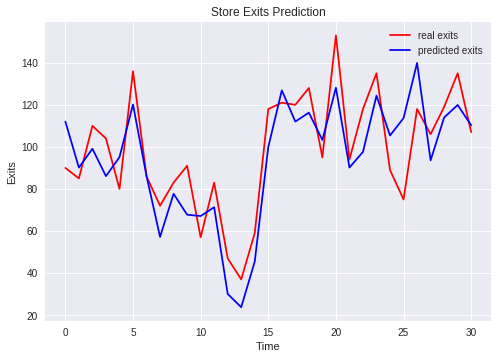

In [0]:
import matplotlib.pyplot as plt
#visualise the results
plt.plot(inv_y, color='red', label='real exits')
plt.plot(inv_yhat, color='blue', label='predicted exits')
plt.title('Store Exits Prediction')
plt.xlabel('Time')
plt.ylabel('Exits')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test RMSE: 18.506


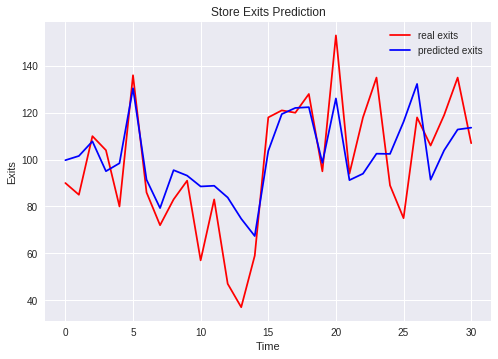

In [0]:
from sklearn.svm import SVR

svm_regr2 = SVR()

svm_regr2.fit(svm_X_train, svm_y_train)

svm_preds2 = svm_regr2.predict(svm_X_test)

# invert scaling for forecast to revert data into original form
inv_yhat2 = np.concatenate((svm_X_test[:,0].reshape(-1,1), svm_preds2.reshape(-1,1), svm_X_test[:, 1:]), axis=1)
inv_yhat2 = scaler.inverse_transform(inv_yhat2)
inv_yhat2 = inv_yhat2[:,1]


# calculate RMSE
rmse2 = math.sqrt(mean_squared_error(inv_y, inv_yhat2))
print('Test RMSE: %.3f' % rmse2)


#visualise the results
plt.plot(inv_y, color='red', label='real exits')
plt.plot(inv_yhat2, color='blue', label='predicted exits')
plt.title('Store Exits Prediction')
plt.xlabel('Time')
plt.ylabel('Exits')
plt.legend()
plt.show()

# LSTM

In [0]:
##############################################################################
#LSTM take 1
##############################################################################

def convert_timeseries(data, n_in=1, n_out=1, dropnan=True):
	#covert timeseries data to t-n to t-1 form
	#n defines how many previous value should be taken into consideration
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg



In [0]:
# import the appropriate library
from sklearn.preprocessing import MinMaxScaler

values = model_data.values

values = values.astype('float32')
# normalize features
mm_scaler = MinMaxScaler(feature_range=(0, 1))
scaled = mm_scaler.fit_transform(values)
# use predefined function to store previous rows values of each input in separate cols
reframed = convert_timeseries(scaled, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.629630   0.360215   0.046196   0.430737   0.301413   0.142857   
2   0.740741   0.602151   0.411826   0.583675   0.187705   0.142857   
3   0.740741   0.596774   0.638016   0.493389   0.220753   0.285714   
4   0.629630   0.376344   0.337792   1.000000   0.237368   0.285714   
5   0.703704   0.677419   0.601363   0.412170   0.110906   0.380952   

   var7(t-1)  var8(t-1)  var9(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  \
1   0.190476        0.0   0.093003  0.740741  0.602151  0.411826  0.583675   
2   0.285714        0.0   0.075780  0.740741  0.596774  0.638016  0.493389   
3   0.333333        0.0   0.047413  0.629630  0.376344  0.337792  1.000000   
4   0.380952        0.0   0.000000  0.703704  0.677419  0.601363  0.412170   
5   0.428571        0.0   0.051189  0.583333  0.317204  0.275226  0.571129   

    var5(t)   var6(t)   var7(t)   var8(t)   var9(t)  
1  0.187705  0.142857  0.285714  0.000000  0.07578

In [0]:
#drop the current values from the predictor variables
reframed.drop(reframed.columns[[9,11,12,13,14,15,16,17]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.629630   0.360215   0.046196   0.430737   0.301413   0.142857   
2   0.740741   0.602151   0.411826   0.583675   0.187705   0.142857   
3   0.740741   0.596774   0.638016   0.493389   0.220753   0.285714   
4   0.629630   0.376344   0.337792   1.000000   0.237368   0.285714   
5   0.703704   0.677419   0.601363   0.412170   0.110906   0.380952   

   var7(t-1)  var8(t-1)  var9(t-1)   var2(t)  
1   0.190476        0.0   0.093003  0.602151  
2   0.285714        0.0   0.075780  0.596774  
3   0.333333        0.0   0.047413  0.376344  
4   0.380952        0.0   0.000000  0.677419  
5   0.428571        0.0   0.051189  0.317204  


In [0]:
values = reframed.values
#leave last 30 days for test
train = values[:111, :]
test = values[111:, :]
# split into input and outputs
train_X= train[:, :-1]
train_y= train[:, -1]
test_X= test[:, :-1]
test_y= test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(111, 1, 9) (111,) (30, 1, 9) (30,)


In [0]:
#import the keras libraries
#sequential model for RNN structure
from keras.models import Sequential
#Dense for output layer
from keras.layers import Dense
#For LSTM layers
from keras.layers import LSTM
#For dropout regularisation to prevent overfitting
from keras.layers import Dropout

In [0]:
#build the lstm network
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
lstm_model.add(Dropout(rate=0.2))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(rate=0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mae', optimizer='adam')

Train on 111 samples, validate on 30 samples
Epoch 1/50
 - 3s - loss: 0.2003 - val_loss: 0.1245
Epoch 2/50
 - 1s - loss: 0.1088 - val_loss: 0.1260
Epoch 3/50
 - 1s - loss: 0.1105 - val_loss: 0.1303
Epoch 4/50
 - 1s - loss: 0.1077 - val_loss: 0.1249
Epoch 5/50
 - 1s - loss: 0.1085 - val_loss: 0.1257
Epoch 6/50
 - 1s - loss: 0.1111 - val_loss: 0.1273
Epoch 7/50
 - 1s - loss: 0.1076 - val_loss: 0.1274
Epoch 8/50
 - 1s - loss: 0.1028 - val_loss: 0.1241
Epoch 9/50
 - 1s - loss: 0.1020 - val_loss: 0.1221
Epoch 10/50
 - 1s - loss: 0.1038 - val_loss: 0.1230
Epoch 11/50
 - 1s - loss: 0.1007 - val_loss: 0.1209
Epoch 12/50
 - 1s - loss: 0.0988 - val_loss: 0.1210
Epoch 13/50
 - 1s - loss: 0.0996 - val_loss: 0.1208
Epoch 14/50
 - 1s - loss: 0.1035 - val_loss: 0.1206
Epoch 15/50
 - 1s - loss: 0.0986 - val_loss: 0.1200
Epoch 16/50
 - 1s - loss: 0.0985 - val_loss: 0.1206
Epoch 17/50
 - 1s - loss: 0.1014 - val_loss: 0.1234
Epoch 18/50
 - 1s - loss: 0.0984 - val_loss: 0.1211
Epoch 19/50
 - 1s - loss: 0.

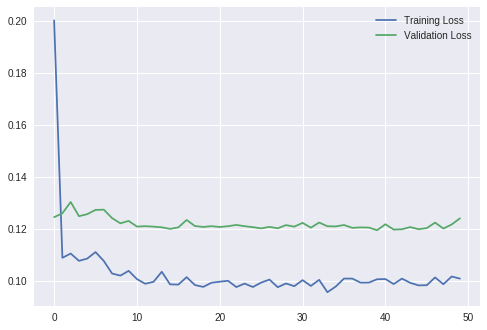

In [0]:
# fit network
history = lstm_model.fit(train_X, train_y, epochs=50, batch_size=1, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [0]:
# make a prediction
yhat = lstm_model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast to revert data into original form
inv_yhat = np.concatenate((test_X[:,0].reshape(-1,1), yhat, test_X[:, 2:]), axis=1)
inv_yhat = mm_scaler.inverse_transform(inv_yhat)
# Actual Input
inv_xp=np.delete(inv_yhat,[1], axis = 1)
#predicted output
inv_yhat = inv_yhat[:,1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:,0].reshape(-1,1),test_y, test_X[:, 2:]), axis=1)
inv_y = mm_scaler.inverse_transform(inv_y)
#Actual output
inv_y = inv_y[:,1]
print("Actial Input:")
print(inv_xp)
print("Actual output:")
print(inv_y)
#predicted output will be offset by 1
print("Predicted output:")
print(inv_yhat)


Actial Input:
[[ 9.80000000e+01  2.31584692e+03  1.65973083e+03 -8.61509399e+01
   3.00000000e+01  2.70000000e+01  0.00000000e+00  1.07202430e+05]
 [ 8.50000000e+01  3.54336450e+03  1.71163184e+03 -8.62829361e+01
   3.00000000e+01  2.30000000e+01  6.99999988e-01  1.08614867e+05]
 [ 8.80000000e+01  5.50182959e+03  1.90239722e+03 -8.61668930e+01
   2.30000000e+01  2.10000000e+01  4.09999990e+00  1.08594453e+05]
 [ 7.80000000e+01  3.60634595e+03  1.61191907e+03 -8.53140488e+01
   2.70000000e+01  2.40000000e+01  1.00000001e-01  1.08952727e+05]
 [ 8.40000000e+01  3.00353564e+03  1.72651843e+03 -8.64812698e+01
   2.70000000e+01  2.50000000e+01  0.00000000e+00  1.09153906e+05]
 [ 1.03000000e+02  3.45549512e+03  1.81541736e+03 -8.75453033e+01
   2.70000000e+01  2.40000000e+01  0.00000000e+00  1.09755141e+05]
 [ 8.70000000e+01  2.26887354e+03  1.97574438e+03 -8.66130829e+01
   2.70000000e+01  2.40000000e+01  0.00000000e+00  1.09755141e+05]
 [ 5.70000000e+01  3.54464893e+03  1.90899097e+03 -8.66

In [0]:
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 28.755


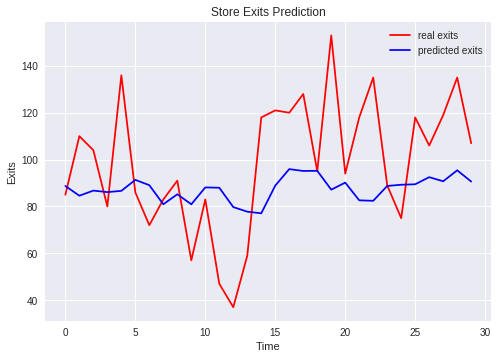

In [0]:
#visualise the results
plt.plot(inv_y, color='red', label='real exits')
plt.plot(inv_yhat, color='blue', label='predicted exits')
plt.title('Store Exits Prediction')
plt.xlabel('Time')
plt.ylabel('Exits')
plt.legend()
plt.show()

# Take 2 at LSTM


In [0]:
x_data = model_data.drop(['Exits'], axis =1)
y_data = model_data['Exits']
x_values = x_data.values
x_values = x_values.astype('float32')
y_values = y_data.values
y_values = y_values.astype('float32')
x_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = x_scaler.fit_transform(x_values)
y_scaled = y_scaler.fit_transform(y_values.reshape(-1,1))

In [0]:
X_train1 = []
X_train2=[]
X_train3=[]
X_train4=[]
X_train5=[]
X_train6=[]
X_train7=[]
X_train8=[]
Y_train = []

for i in range(7,112):
    X_train1.append(x_scaled[i-7:i,0])
    X_train2.append(x_scaled[i-7:i,1])
    X_train3.append(x_scaled[i-7:i,2])
    X_train4.append(x_scaled[i-7:i,3])
    X_train5.append(x_scaled[i-7:i,4])
    X_train6.append(x_scaled[i-7:i,5])
    X_train7.append(x_scaled[i-7:i,6])
    X_train8.append(x_scaled[i-7:i,7])
    Y_train.append(y_scaled[i,0])
    
X_train1, X_train2, X_train3, X_train4, X_train5, X_train6, X_train7, X_train8, Y_train =np.array(X_train1), np.array(X_train2), np.array(X_train3), np.array(X_train4), np.array(X_train5), np.array(X_train6), np.array(X_train7), np.array(X_train8), np.array(Y_train)

X_trainComb = np.stack([X_train1,X_train2,X_train3,X_train4,X_train5,X_train6,X_train7,X_train8],axis=2)


In [0]:
#format test data as we did for training set
X_test1 = []
X_test2 = []
X_test3 = []
X_test4 = []
X_test5 = []
X_test6 = []
X_test7 = []
X_test8 = []
for i in range(112,142):
    X_test1.append(x_scaled[i-7:i,0])
    X_test2.append(x_scaled[i-7:i,1])
    X_test3.append(x_scaled[i-7:i,2])
    X_test4.append(x_scaled[i-7:i,3])
    X_test5.append(x_scaled[i-7:i,4])
    X_test6.append(x_scaled[i-7:i,5])
    X_test7.append(x_scaled[i-7:i,6])
    X_test8.append(x_scaled[i-7:i,7])
   
X_test1, X_test2, X_test3, X_test4, X_test5, X_test6, X_test7, X_test8 =np.array(X_test1), np.array(X_test2), np.array(X_test3), np.array(X_test4), np.array(X_test5), np.array(X_test6), np.array(X_test7), np.array(X_test8)
#X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_testcomb = np.stack([X_test1,X_test2,X_test3,X_test4,X_test5,X_test6,X_test7,X_test8],axis=2)


In [0]:
y_test = model_data.iloc[112:,1]

In [0]:
lstm_model2 = Sequential()
lstm_model2.add(LSTM(units=50, return_sequences = True, input_shape = (X_trainComb.shape[1],8)))
#adding dropout reg - number of neurons to ignore @ each pass in training - standard value is 0.2
lstm_model.add(Dropout(rate=0.2))

#Adding second LSTM layers with dropout reg - don't need to specify shape - picks it up from 1st layer
lstm_model2.add(LSTM(units=50, return_sequences = True))
lstm_model2.add(Dropout(rate=0.2))

#Adding third LSTM layers with dropout reg
lstm_model2.add(LSTM(units=50, return_sequences = True))
lstm_model2.add(Dropout(rate=0.2))

#Adding fourth LSTM layers with dropout reg - as last layer we don't want to return a sequence
lstm_model2.add(LSTM(units=50))
lstm_model2.add(Dropout(rate=0.2))

#Add the output layer
lstm_model2.add(Dense(units=1))

In [0]:
lstm_model2.compile(optimizer='adam', loss='mse')

#fitting the RNN to the training set
#submit data in batches of 32
lstm_model2.fit(x=X_trainComb, y=Y_train,epochs=20,batch_size=1, validation_data = (X_testcomb, y_test))


Train on 105 samples, validate on 30 samples
Epoch 1/20
105/105 [==============================] - 8s 73ms/step - loss: 0.0369 - val_loss: 10449.0173
Epoch 2/20
105/105 [==============================] - 2s 19ms/step - loss: 0.0241 - val_loss: 10449.1192
Epoch 3/20
105/105 [==============================] - 2s 19ms/step - loss: 0.0236 - val_loss: 10430.9856
Epoch 4/20
105/105 [==============================] - 2s 19ms/step - loss: 0.0206 - val_loss: 10460.9881
Epoch 5/20
105/105 [==============================] - 2s 19ms/step - loss: 0.0210 - val_loss: 10425.7269
Epoch 6/20
105/105 [==============================] - 2s 19ms/step - loss: 0.0196 - val_loss: 10447.9715
Epoch 7/20
105/105 [==============================] - 2s 19ms/step - loss: 0.0212 - val_loss: 10441.0820
Epoch 8/20
105/105 [==============================] - 2s 19ms/step - loss: 0.0199 - val_loss: 10437.2164
Epoch 9/20
105/105 [==============================] - 2s 19ms/step - loss: 0.0211 - val_loss: 10447.1529
Epoch 10/2

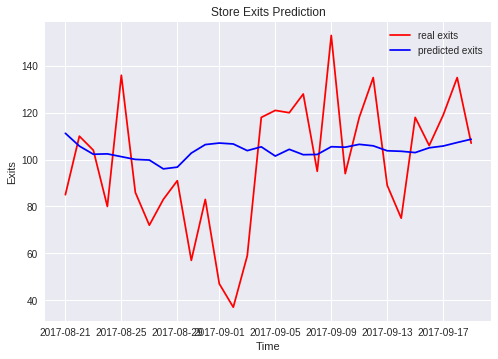

In [0]:
#create predictions
predicted_exits = lstm_model2.predict(X_testcomb)

#reverse the scaling so the predictions are on the original scale
predicted_exits = y_scaler.inverse_transform(predicted_exits)


#visualise results
import matplotlib.pyplot as plt


predicted_exits = pd.DataFrame(predicted_exits, index = y_test.index)

plt.plot(y_test, color='red', label='real exits')
plt.plot(predicted_exits, color='blue', label='predicted exits')
plt.title('Store Exits Prediction')
plt.xlabel('Time')
plt.ylabel('Exits')
plt.legend()
plt.show()

In [0]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, predicted_exits))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 28.155
